In [1]:
# delta Y_o matrix in equation 13

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import re
import regionmask
import cartopy.crs as ccrs
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script

In [2]:
# Name of input Netcdf file
case_names = ['Jan', 'Feb', 'Mar'] # name parts of 3 simulations

input_directory = '/geos/u73/msadiq/GEOS-Chem/analysis/python/data/'
input_file = 'XCO2_model.nc'

output_directory = input_directory

# Name of output netCDF file
output_file = output_directory + 'delta_Y.nc'

In [5]:
ds_xco2_model = xr.open_dataset(input_directory + input_file)
varnames = list(ds_xco2_model.data_vars.keys())
varnames[47:69]
#ds_xco2_model

['Mar_X_SpeciesConc_CO2Tag1',
 'Mar_X_SpeciesConc_CO2Tag2',
 'Mar_X_SpeciesConc_CO2Tag3',
 'Mar_X_SpeciesConc_CO2Tag4',
 'Mar_X_SpeciesConc_CO2Tag5',
 'Mar_X_SpeciesConc_CO2Tag6',
 'Mar_X_SpeciesConc_CO2Tag7',
 'Mar_X_SpeciesConc_CO2Tag8',
 'Mar_X_SpeciesConc_CO2Tag9',
 'Mar_X_SpeciesConc_CO2Tag10',
 'Mar_X_SpeciesConc_CO2Tag11',
 'Mar_X_SpeciesConc_CO2Tag12',
 'Mar_X_SpeciesConc_CO2Tag13',
 'Mar_X_SpeciesConc_CO2Tag14',
 'Mar_X_SpeciesConc_CO2Tag15',
 'Mar_X_SpeciesConc_CO2Tag16',
 'Mar_X_SpeciesConc_CO2Tag17',
 'Mar_X_SpeciesConc_CO2Tag18',
 'Mar_X_SpeciesConc_CO2Tag19',
 'Mar_X_SpeciesConc_CO2Tag20',
 'Mar_X_SpeciesConc_CO2Tag21',
 'Mar_X_SpeciesConc_CO2Tag22']

In [37]:
xco2_oco2 = ds_xco2_model['xco2_obs']
x = xco2_oco2
x = x[np.logical_not(np.isnan(x))]
ind = x.record.values

In [38]:
#del_Y_matrix = np.empty((len(ds_xco2_model['lat']),22))
del_Y_matrix = np.empty((len(ind),22))
del_Y_matrix[:] = np.nan
np.shape(del_Y_matrix)
for itag in range(22):
    name_var = 'Mar_X_SpeciesConc_CO2Tag' + str(itag+1)
    del_Y_matrix[:,itag] = ds_xco2_model[name_var][ind].values

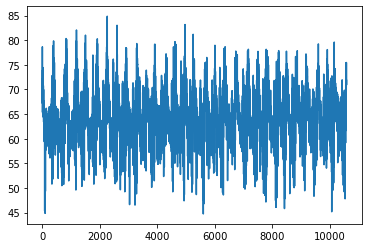

In [40]:
plt.plot(del_Y_matrix[:,1])

In [44]:
del_Y_tran = np.matrix.transpose(del_Y_matrix)
k_e = np.linalg.inv(np.matmul(del_Y_matrix, del_Y_tran) + 2)
k_e = np.matmul(del_Y_tran, k_e)
np.shape(k_e)

(22, 10588)

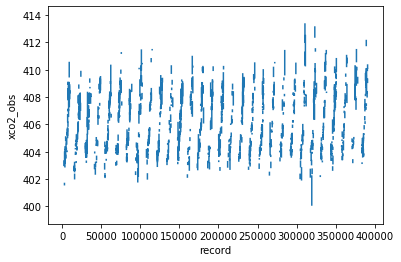

In [4]:
ds_xco2_model['xco2_obs'].plot()

In [6]:
tmp = np.array(np.zeros(66))
tmp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
delta_Y = ds_xco2_model['xco2_obs']
delta_Y['date'] = ds_xco2_model['date']
delta_Y['lat'] = ds_xco2_model['lat']
delta_Y['lon'] = ds_xco2_model['lon']
delta_Y = delta_Y.to_dataset()

for n, ivar in enumerate(varnames[3:69]):
    #print(ivar)
    delta_Y[ivar] = ds_xco2_model['xco2_obs'] - ds_xco2_model[ivar]
    tmp[n] = ds_xco2_model[ivar].mean().values

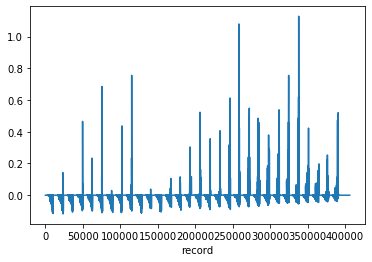

In [8]:
diff = ds_xco2_model['Mar_X_SpeciesConc_CO2Tag11'] - ds_xco2_model['Jan_X_SpeciesConc_CO2Tag11']
diff.plot()

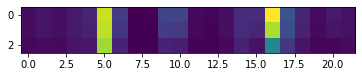

In [9]:
tmp1 = tmp.reshape(3,22)
plt.imshow(tmp1)
#plt.colorbar()

In [10]:
delta_Y['Jan_X_SpeciesConc_CO2Tag12']

<xarray.DataArray 'Jan_X_SpeciesConc_CO2Tag12' (record: 406224)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * record   (record) int64 0 1 2 3 4 5 ... 406219 406220 406221 406222 406223
    date     (record) datetime64[ns] ...
    lat      (record) float64 ...
    lon      (record) float64 ...

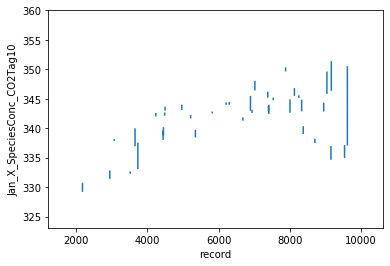

In [11]:
date1 = np.array('2018-03-01',dtype='datetime64[D]')
#slice_Y = delta_Y.where(delta_Y.date == date1)
ind = delta_Y.date == date1
slice_Y = delta_Y['Jan_X_SpeciesConc_CO2Tag10'][ind]
slice_Y.plot()

In [12]:
# Creat target dataarray and dataset
lat_res = 2    # horizontal resolution of lat and lon you would want
lon_res = 2.5
lat = np.linspace(-90, 90, int(180/lat_res + 1)) # grid
lon = np.linspace(-180, 177.5, int(360/lon_res))
first_day = '2018-03-01'
last_day_p1 = '2018-04-01'

day_1   = np.array(first_day,dtype='datetime64[D]')
day_end = np.array(last_day_p1,dtype='datetime64[D]')
days    = np.arange(day_1, day_end, dtype='datetime64[D]') # time dimension of output

var_2d = xr.DataArray(data = np.nan, 
                      dims = ('lat', 'lon'), 
                      coords = {'lat': lat,
                                'lon': lon},
                      name = 'tmp')
var_2d = var_2d.astype(dtype='float32')
delta_Y_2d = var_2d.to_dataset() # initialise a dataset to store all dataarrays

In [ ]:
# map to target grid and store in dataset
#subset_varnames = ['Jan_X_SpeciesConc_CO2Tag1', 'Feb_X_SpeciesConc_CO2Tag1', 'Mar_X_SpeciesConc_CO2Tag1']
for ivar in varnames[3:69]:
#for ivar in subset_varnames:
    var_2d[:,:] = np.nan
    
    for ilon in range(len(lon)):
        ind = delta_Y.lon == lon[ilon]
        delta_Y_tmp = delta_Y[ivar][ind]
        
        for ilat in range(len(lat)):
            ind2 = delta_Y_tmp.lat == lat[ilat]
            delta_Y_tmp2 = delta_Y_tmp[ind2]
            tmp = delta_Y_tmp2.dropna(dim='record')
            if len(tmp)!=0:
                var_2d[ilat,ilon] = tmp.mean().values
                
    print(ivar)
    delta_Y_2d[ivar] = var_2d.copy()

Jan_X_SpeciesConc_CO2Tag1
Jan_X_SpeciesConc_CO2Tag2
Jan_X_SpeciesConc_CO2Tag3
Jan_X_SpeciesConc_CO2Tag4
Jan_X_SpeciesConc_CO2Tag5
Jan_X_SpeciesConc_CO2Tag6
Jan_X_SpeciesConc_CO2Tag7
Jan_X_SpeciesConc_CO2Tag8
Jan_X_SpeciesConc_CO2Tag9
Jan_X_SpeciesConc_CO2Tag10
Jan_X_SpeciesConc_CO2Tag11
Jan_X_SpeciesConc_CO2Tag12
Jan_X_SpeciesConc_CO2Tag13
Jan_X_SpeciesConc_CO2Tag14
Jan_X_SpeciesConc_CO2Tag15
Jan_X_SpeciesConc_CO2Tag16
Jan_X_SpeciesConc_CO2Tag17
Jan_X_SpeciesConc_CO2Tag18
Jan_X_SpeciesConc_CO2Tag19
Jan_X_SpeciesConc_CO2Tag20
Jan_X_SpeciesConc_CO2Tag21
Jan_X_SpeciesConc_CO2Tag22
Feb_X_SpeciesConc_CO2Tag1
Feb_X_SpeciesConc_CO2Tag2
Feb_X_SpeciesConc_CO2Tag3
Feb_X_SpeciesConc_CO2Tag4
Feb_X_SpeciesConc_CO2Tag5
Feb_X_SpeciesConc_CO2Tag6
Feb_X_SpeciesConc_CO2Tag7
Feb_X_SpeciesConc_CO2Tag8
Feb_X_SpeciesConc_CO2Tag9
Feb_X_SpeciesConc_CO2Tag10
Feb_X_SpeciesConc_CO2Tag11
Feb_X_SpeciesConc_CO2Tag12
Feb_X_SpeciesConc_CO2Tag13
Feb_X_SpeciesConc_CO2Tag14
Feb_X_SpeciesConc_CO2Tag15
Feb_X_SpeciesConc_C

In [ ]:
diff = delta_Y_2d['Jan_X_SpeciesConc_CO2Tag1'] - delta_Y_2d['Mar_X_SpeciesConc_CO2Tag1']
#diff.plot()

# after regridding
fig = plt.figure(figsize=[6, 6])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)
ax.coastlines()
delta_Y_2d['Jan_X_SpeciesConc_CO2Tag1'].plot(ax=ax, transform=ccrs.PlateCarree(), vmax=410000, vmin=398000, cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.4, 'label': 'ppb'})
#diff.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.4, 'label': 'ppb'})
ax.set_title('OCO-2: XCO2');
#delta_Y_2d['Jan_X_SpeciesConc_CO2Tag11'].plot()

In [ ]:
delta_Y_2d

In [ ]:
print(output_file)
delta_Y_2d.attrs['unit'] = 'ppbv'
delta_Y_2d.to_netcdf(path=output_file)

In [ ]:
tag1 = delta_Y_2d['Jan_X_SpeciesConc_CO2Tag1']
mask = regionmask.defined_regions.giorgi.mask(tag1)

In [ ]:
jan_tag1_regional = tag1.groupby(mask).mean('stacked_lat_lon')
feb_tag1_regional = delta_Y_2d['Feb_X_SpeciesConc_CO2Tag1'].groupby(mask).mean('stacked_lat_lon')
mar_tag1_regional = delta_Y_2d['Mar_X_SpeciesConc_CO2Tag1'].groupby(mask).mean('stacked_lat_lon')
diff = jan_tag1_regional - mar_tag1_regional
plt.plot(diff)

In [ ]:
y = [tag1_regional['Jan_X_SpeciesConc_CO2Tag1'][0], tag1_regional['Feb_X_SpeciesConc_CO2Tag1'][0], tag1_regional['Mar_X_SpeciesConc_CO2Tag1'][0]]

In [ ]:
plt.plot([1,2,3],y)